In [2]:
! pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.regularizers import *
from PIL import Image
import cv2
import os
from cv2 import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip '/content/drive/My Drive/captcha.zip' -d '/content'

Archive:  /content/drive/My Drive/captcha.zip
   creating: /content/captcha/
  inflating: /content/captcha/226md.png  
  inflating: /content/captcha/22d5n.png  
  inflating: /content/captcha/2356g.png  
  inflating: /content/captcha/23mdg.png  
  inflating: /content/captcha/23n88.png  
  inflating: /content/captcha/243mm.png  
  inflating: /content/captcha/244e2.png  
  inflating: /content/captcha/245y5.png  
  inflating: /content/captcha/24f6w.png  
  inflating: /content/captcha/24pew.png  
  inflating: /content/captcha/25257.png  
  inflating: /content/captcha/253dc.png  
  inflating: /content/captcha/25egp.png  
  inflating: /content/captcha/25m6p.png  
  inflating: /content/captcha/25p2m.png  
  inflating: /content/captcha/25w53.png  
  inflating: /content/captcha/264m5.png  
  inflating: /content/captcha/268g2.png  
  inflating: /content/captcha/28348.png  
  inflating: /content/captcha/28x47.png  
  inflating: /content/captcha/2b827.png  
  inflating: /content/captcha/2bg48.png  

In [6]:
captcha_length = 5
captcha_img_shape = (50, 200, 1)
num_of_sample = len(os.listdir('captcha'))


In [36]:
captchaCharacters = {}
for i, img in enumerate(os.listdir('captcha')):
  imgName = img.split('.')[0]
  for character in imgName:
    if character not in captchaCharacters.keys():
      captchaCharacters[character] = 1
    else:
      captchaCharacters[character] += 1
for character, frequency in zip(captchaCharacters.keys(), captchaCharacters.values()):
  print(f'Character : {character}, Frequency : {frequency}')
number_of_characters = len(captchaCharacters.keys())
print('Number of diffrerent characters : ' + str(number_of_characters))

Character : 7, Frequency : 262
Character : 8, Frequency : 272
Character : e, Frequency : 245
Character : c, Frequency : 276
Character : 3, Frequency : 271
Character : x, Frequency : 271
Character : n, Frequency : 541
Character : g, Frequency : 281
Character : 6, Frequency : 267
Character : m, Frequency : 282
Character : y, Frequency : 240
Character : w, Frequency : 244
Character : 5, Frequency : 288
Character : d, Frequency : 269
Character : p, Frequency : 259
Character : 4, Frequency : 289
Character : 2, Frequency : 270
Character : f, Frequency : 277
Character : b, Frequency : 247
Number of diffrerent characters : 19


In [8]:
X = np.zeros((num_of_sample, 50, 200, 1))
y = np.zeros((captcha_length, num_of_sample, numSymbols))
flag = 0
for i, img in enumerate(os.listdir('captcha')):
  captchaImg = cv2.imread('captcha/'+img, cv2.IMREAD_GRAYSCALE)
  #print(captchaImg)
  captchaImg = captchaImg/255
  captchaImg = np.reshape(captchaImg, captcha_img_shape)
  X[i] = captchaImg
  currentName = np.zeros((captcha_length, numSymbols))
  captchaName = img.split('.')[0]
  #print(captchaName)
  if(len(captchaName)==5):
    for j, character in enumerate(captchaName):
      currentName[j, list(captchaCharacters.keys()).index(character)] = 1
  else:
    flag = flag + 1
  y[:, i] = currentName
print(flag)

1


In [9]:
numTrainingSamples = int(num_of_sample*0.8)
numTestingSamples = int(num_of_sample - numTrainingSamples)
print(numTrainingSamples)
print(numTestingSamples)

856
214


In [10]:
X_train = X[:numTrainingSamples]
y_train = y[:, :numTrainingSamples]
X_test = X[numTrainingSamples:]
y_test = y[:, numTrainingSamples:]

Convolutional Neural Network Model

In [11]:
input = Input(shape=captcha_img_shape)

conv0 = Conv2D(16, activation='relu', kernel_size=5, strides=1, padding="same")(input)
maxpool0 = MaxPool2D(pool_size=(2, 2), padding='same')(conv0)

conv1 = Conv2D(32, activation='relu', kernel_size=3, strides=1, padding="same")(maxpool0)
maxpool1 = MaxPool2D(pool_size=(2, 2), padding='same')(conv1)

conv2 = Conv2D(64, activation='relu', kernel_size=3, strides=1, padding="same")(maxpool1)
maxpool2 = MaxPool2D(pool_size=(2, 2), padding='same')(conv2)

conv3 = Conv2D(128, activation='relu', kernel_size=3, strides=1, padding="same")(maxpool2)
maxpool3 = MaxPool2D(pool_size=(2, 2), padding='same')(conv3)

conv4 = Conv2D(256, activation='relu', kernel_size=3, strides=1, padding="same")(maxpool3)
maxpool4 = MaxPool2D(pool_size=(2, 2), padding='same')(conv4)

flat = Flatten()(maxpool4)
dropout = Dropout(0.5)(flat)
batchnorm = BatchNormalization()(dropout)

dense1 = Dense(64, activation='relu')(batchnorm)
dropout1 = Dropout(0.5)(dense1)
batchnorm1 = BatchNormalization()(dropout1)
output1 = Dense(numSymbols , activation='sigmoid' , name='character1')(batchnorm1)

dense2 = Dense(64, activation='relu')(batchnorm)
dropout2 = Dropout(0.5)(dense2)
batchnorm2 = BatchNormalization()(dropout2)
output2 = Dense(numSymbols , activation='sigmoid' , name='character2')(batchnorm2)

dense3 = Dense(64, activation='relu')(batchnorm)
dropout3 = Dropout(0.5)(dense3)
batchnorm3 = BatchNormalization()(dropout3)
output3 = Dense(numSymbols , activation='sigmoid' , name='character3')(batchnorm3)

dense4 = Dense(64, activation='relu')(batchnorm)
dropout4 = Dropout(0.5)(dense4)
batchnorm4 = BatchNormalization()(dropout4)
output4 = Dense(numSymbols , activation='sigmoid' , name='character4')(batchnorm4)

dense5 = Dense(64, activation='relu')(batchnorm)
dropout5 = Dropout(0.5)(dense5)
batchnorm5 = BatchNormalization()(dropout5)
output5 = Dense(numSymbols , activation='sigmoid' , name='character5')(batchnorm5)

output = [output1, output2, output3, output4, output5]

model = Model(inputs=input, outputs=output, name="captcha-recognition-cnn-model")

In [13]:
model.summary()

Model: "captcha-recognition-cnn-model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 200, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 50, 200, 16)  416         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 25, 100, 16)  0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 25, 100, 32)  4640        ['max

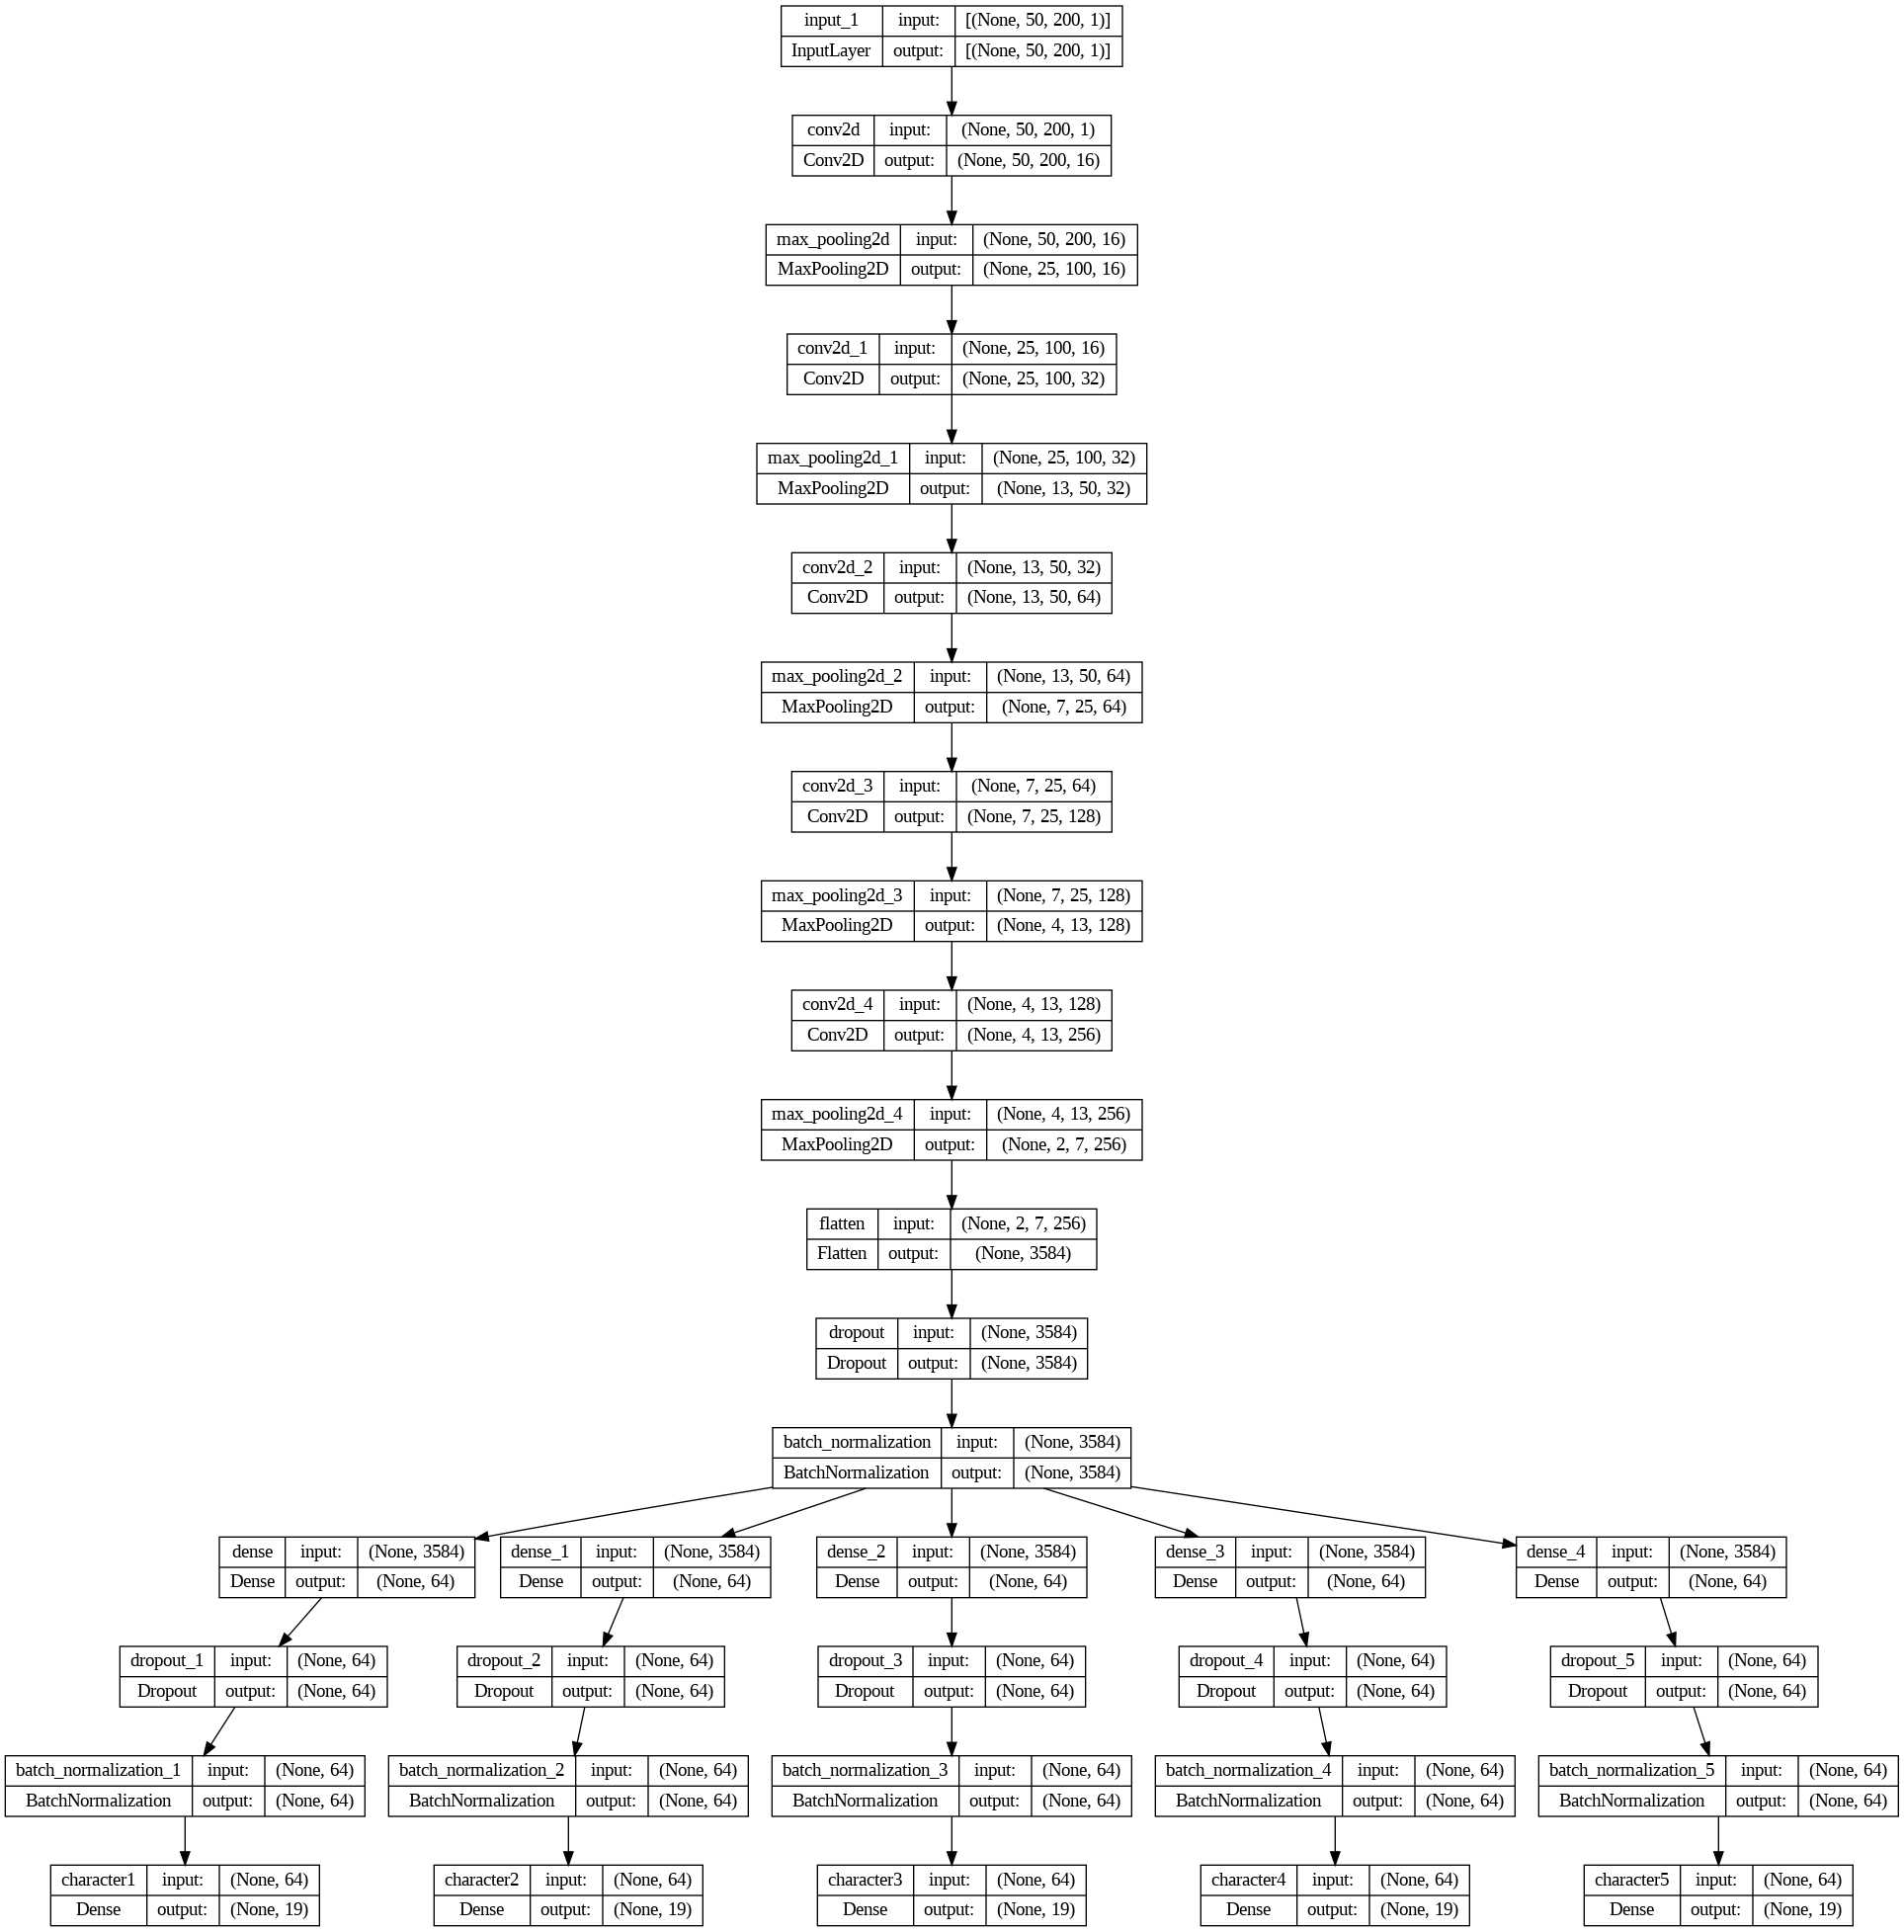

In [14]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [15]:
modelLoss = 'categorical_crossentropy'
modelMetrics= ['accuracy']
modelOptimizer= 'adam'
model.compile(loss=modelLoss, metrics=modelMetrics, optimizer=modelOptimizer)

Training

In [18]:
model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], epochs = 100, batch_size = 30)

Epoch 1/100
29/29 [==============================] - 14s 467ms/step - loss: 1.8266 - character1_loss: 0.2190 - character2_loss: 0.3677 - character3_loss: 0.4888 - character4_loss: 0.4991 - character5_loss: 0.2520 - character1_accuracy: 0.9650 - character2_accuracy: 0.9229 - character3_accuracy: 0.8949 - character4_accuracy: 0.8808 - character5_accuracy: 0.9556
Epoch 2/100
29/29 [==============================] - 13s 454ms/step - loss: 1.7185 - character1_loss: 0.1875 - character2_loss: 0.3491 - character3_loss: 0.4885 - character4_loss: 0.4534 - character5_loss: 0.2400 - character1_accuracy: 0.9801 - character2_accuracy: 0.9276 - character3_accuracy: 0.8902 - character4_accuracy: 0.8995 - character5_accuracy: 0.9509
Epoch 3/100
29/29 [==============================] - 13s 451ms/step - loss: 1.8224 - character1_loss: 0.2352 - character2_loss: 0.3565 - character3_loss: 0.4830 - character4_loss: 0.4959 - character5_loss: 0.2518 - character1_accuracy: 0.9614 - character2_accuracy: 0.9241 -

Testing & Evaluating :

In [21]:
model_evaluation = model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]])

7/7 [==============================] - 1s 125ms/step - loss: 0.2618 - character1_loss: 4.2596e-04 - character2_loss: 0.0180 - character3_loss: 0.0852 - character4_loss: 0.1078 - character5_loss: 0.0504 - character1_accuracy: 1.0000 - character2_accuracy: 0.9953 - character3_accuracy: 0.9720 - character4_accuracy: 0.9766 - character5_accuracy: 0.9953


In [22]:
print(model_evaluation)

[0.26182425022125244, 0.00042595595004968345, 0.01795731484889984, 0.08519309759140015, 0.10784230381250381, 0.05040557309985161, 1.0, 0.9953271150588989, 0.9719626307487488, 0.9766355156898499, 0.9953271150588989]


In [25]:
print(f'Character - 1 Accuracy : {model_evaluation[6]*100} %')
print(f'Character - 2 Accuracy : {model_evaluation[7]*100} %')
print(f'Character - 3 Accuracy : {model_evaluation[8]*100} %')
print(f'Character - 4 Accuracy : {model_evaluation[9]*100} %')
print(f'Character - 5 Accuracy : {model_evaluation[10]*100} %')

Character - 1 Accuracy : 100.0 %
Character - 2 Accuracy : 99.53271150588989 %
Character - 3 Accuracy : 97.19626307487488 %
Character - 4 Accuracy : 97.66355156898499 %
Character - 5 Accuracy : 99.53271150588989 %


Predicting :

In [26]:
characters = list(captchaCharacters.keys())    
predictedCaptchaText = []
testCaptchaText = []

for i, xt in enumerate(X_test):
  xt = np.reshape(X_test[i] , (1, 50,200,1))
  yp = model.predict(xt)
  yp = np.reshape(yp ,(5, numSymbols))  
  pct = ''.join([characters[np.argmax(i)] for i in yp])
  predictedCaptchaText.append(pct)

for i in range(0, numTestingSamples):
  tct = ''.join([characters[i] for i in (np.argmax(y_test[:, i],axis=1))])
  testCaptchaText.append(tct)

1/1 [==============================] - 0s 30ms/step


In [32]:
print("Predicted :" + predictedCaptchaText[23])
print("Real text :"+ testCaptchaText[23])
print("################")
print("Predicted :" + predictedCaptchaText[65])
print("Real text :"+ testCaptchaText[65])
print("################")
print("Predicted :" + predictedCaptchaText[90])
print("Real text :"+ testCaptchaText[90])
print("################")
print("Predicted :" + predictedCaptchaText[17])
print("Real text :"+ testCaptchaText[17])

Predicted :253dc
Real text :253dc
################
Predicted :cen55
Real text :cen55
################
Predicted :x6b5m
Real text :x6b5m
################
Predicted :2en7g
Real text :2en7g


In [33]:
correctPredictions = 0
wrongPredictions = 0
for i in range(0, len(predictedCaptchaText)):
  if predictedCaptchaText[i]==testCaptchaText[i]:
    correctPredictions+=1
  else:
    wrongPredictions+=1
print(f'Correct Predictions : {correctPredictions}\nWrong Predictions : {wrongPredictions}')
print(f'Accuracy : {correctPredictions*100/(correctPredictions+wrongPredictions)} %')

Correct Predictions : 204
Wrong Predictions : 10
Accuracy : 95.32710280373831 %


<ipython-input-39-853c4a65c1db>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize=(10,10))


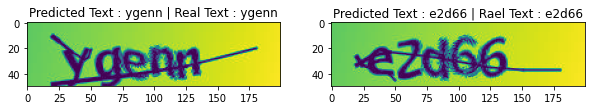

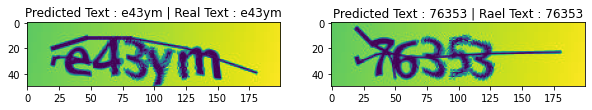

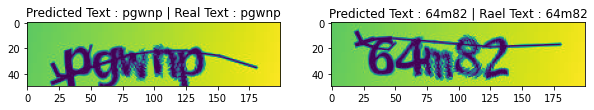

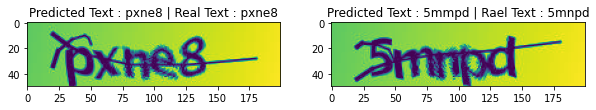

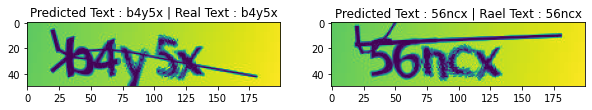

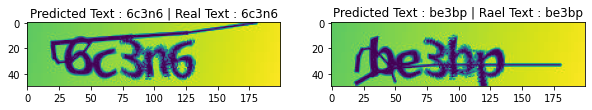

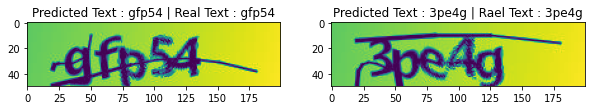

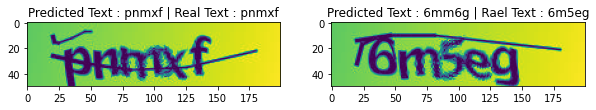

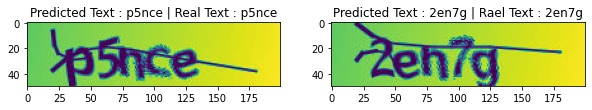

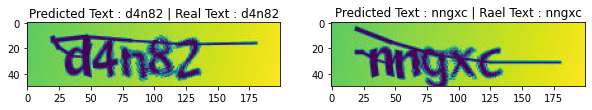

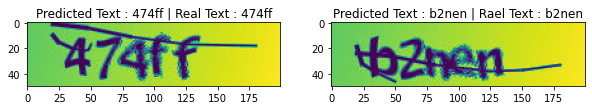

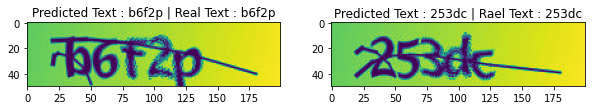

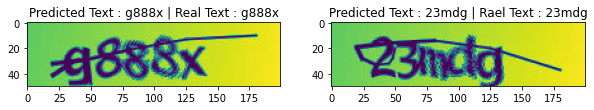

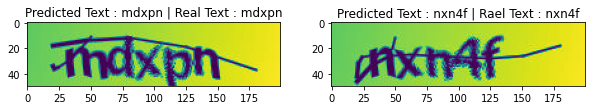

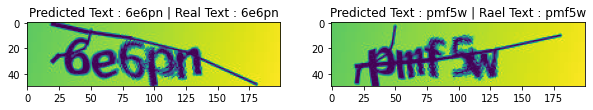

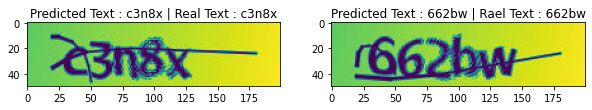

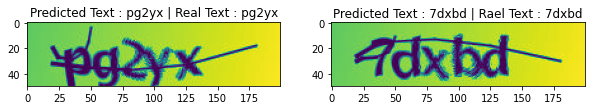

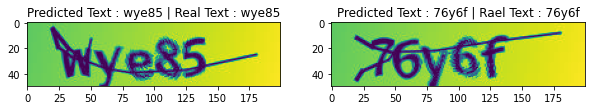

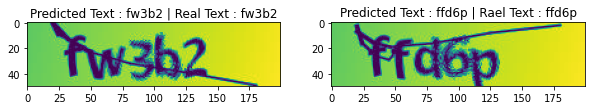

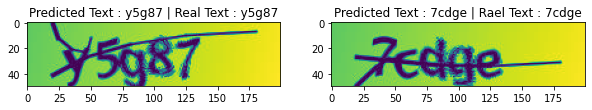

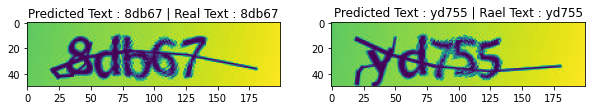

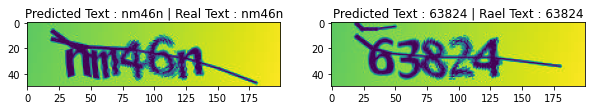

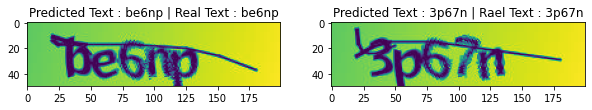

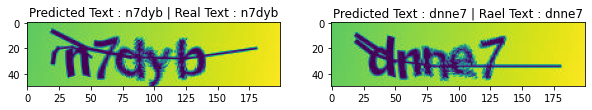

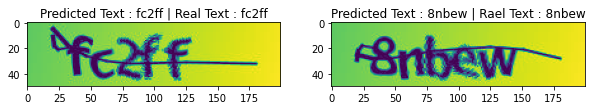

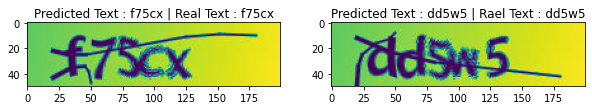

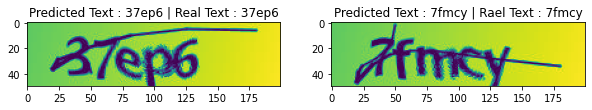

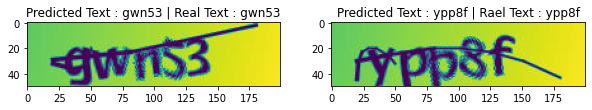

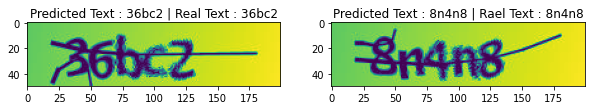

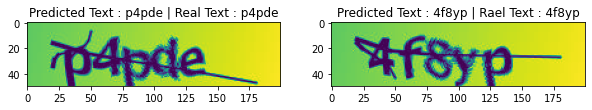

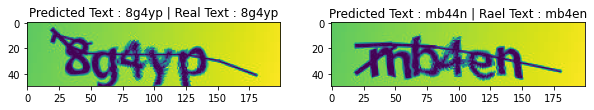

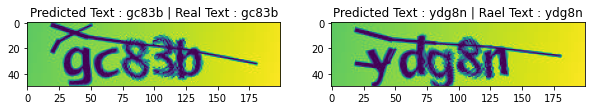

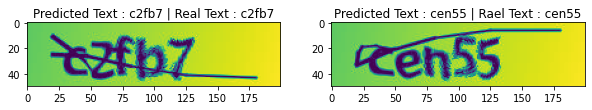

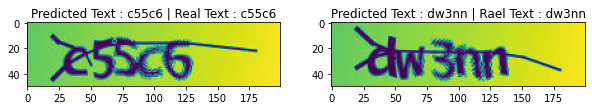

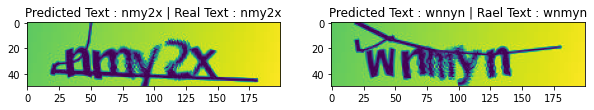

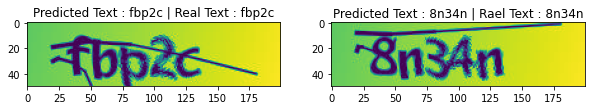

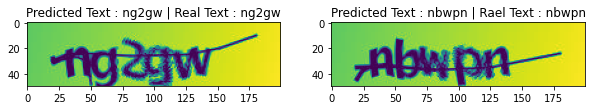

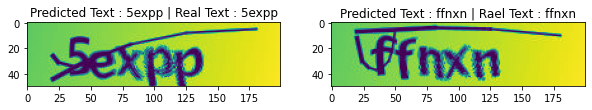

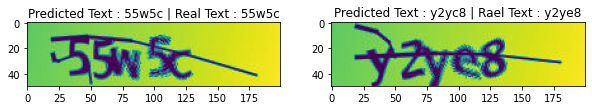

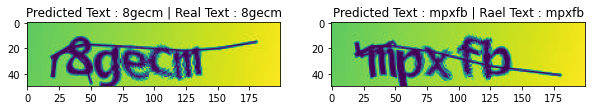

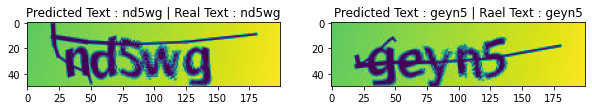

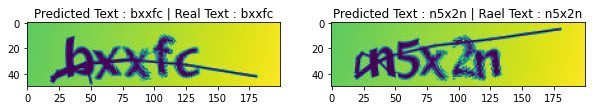

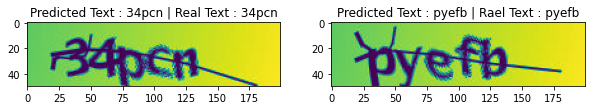

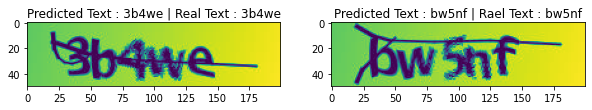

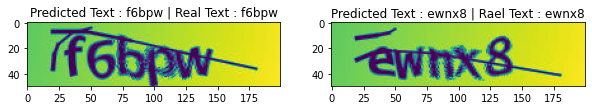

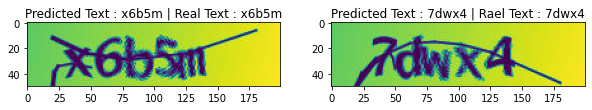

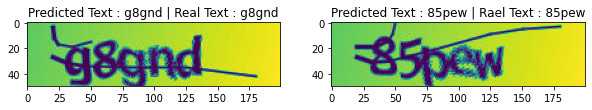

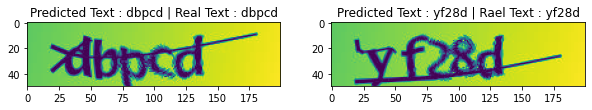

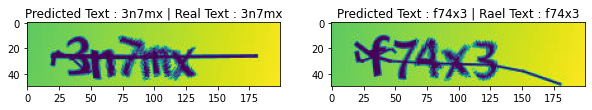

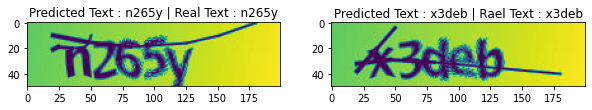

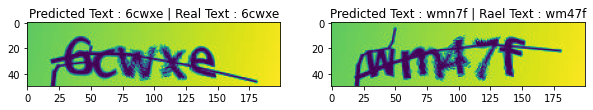

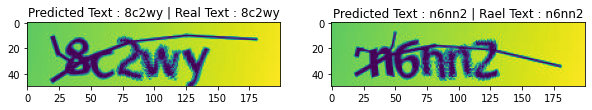

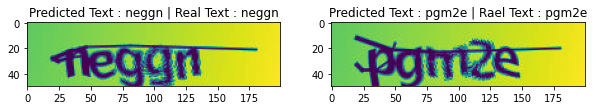

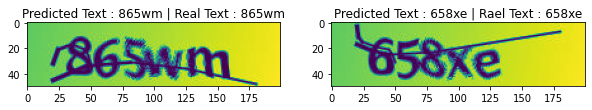

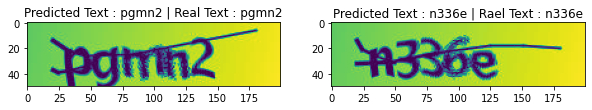

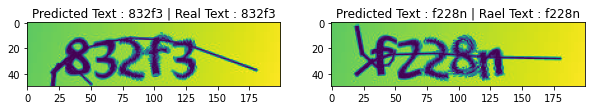

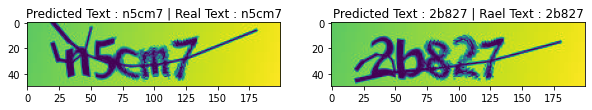

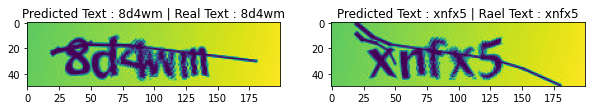

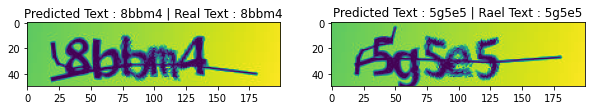

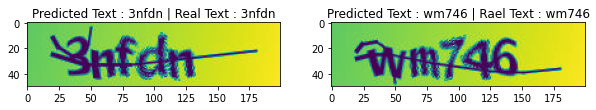

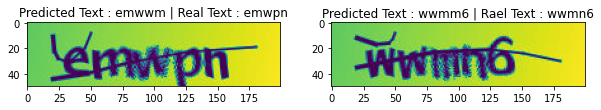

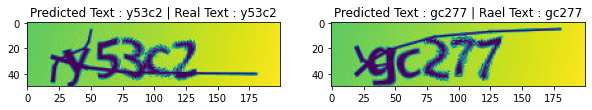

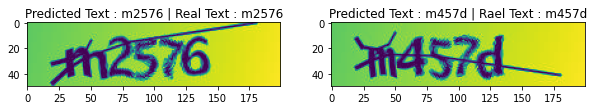

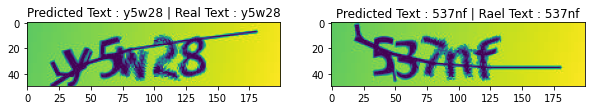

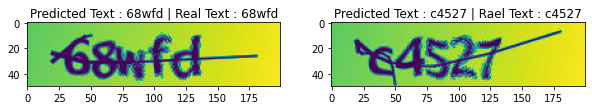

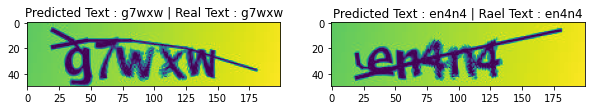

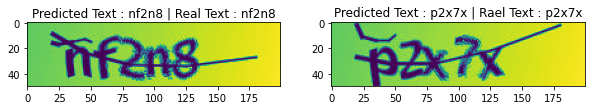

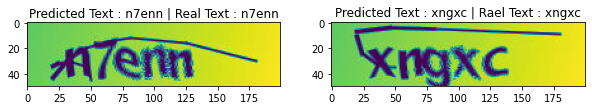

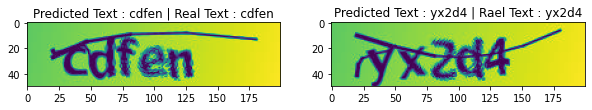

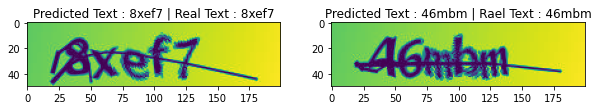

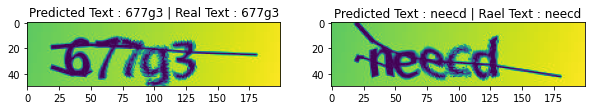

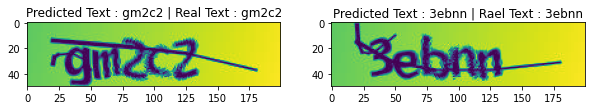

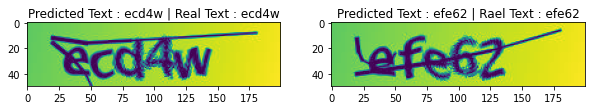

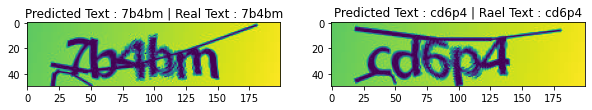

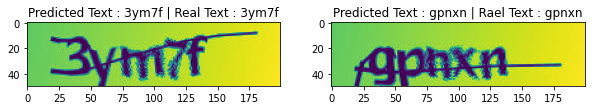

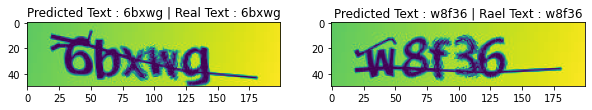

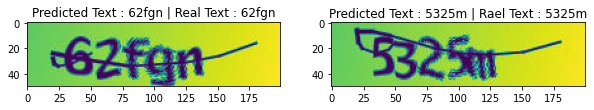

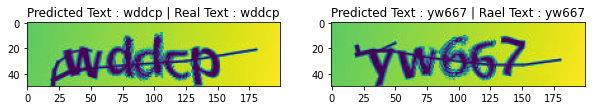

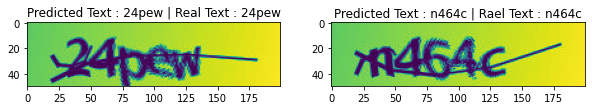

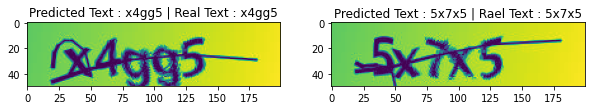

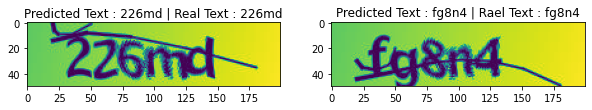

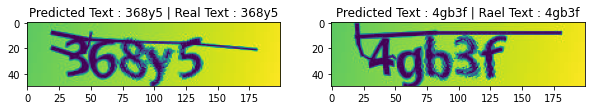

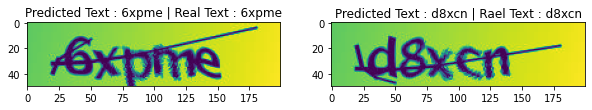

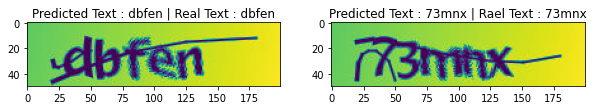

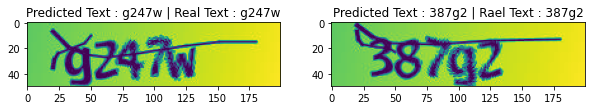

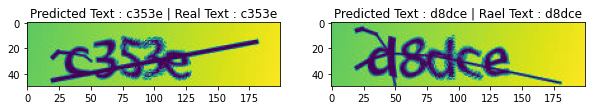

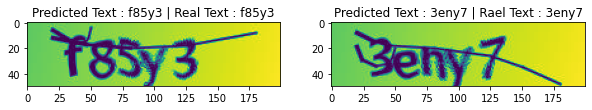

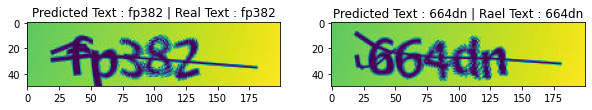

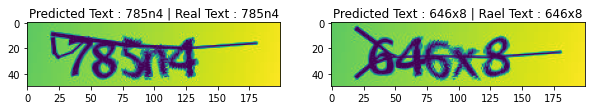

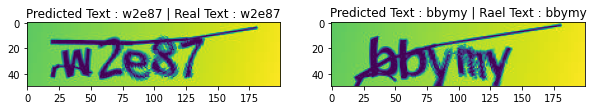

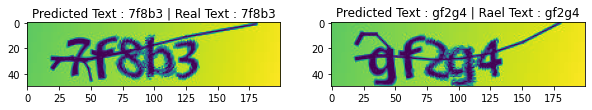

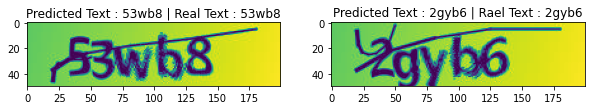

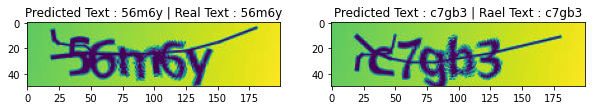

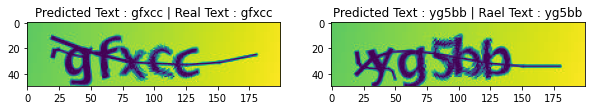

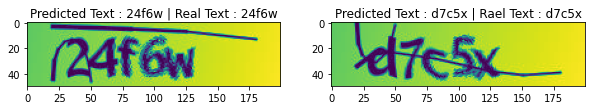

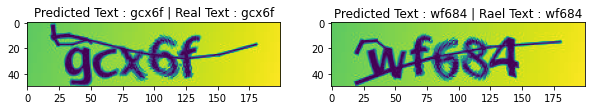

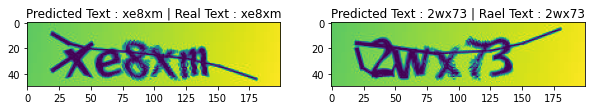

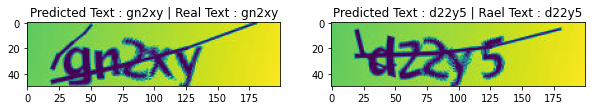

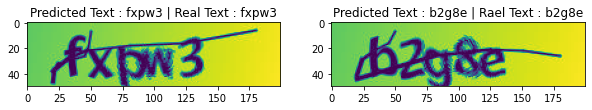

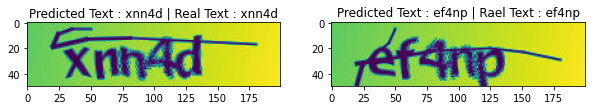

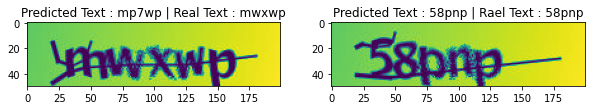

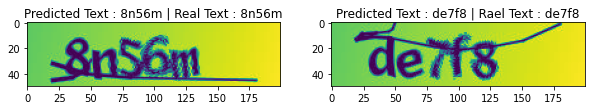

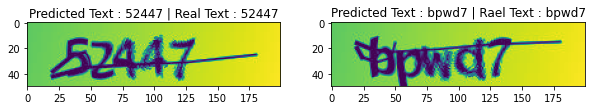

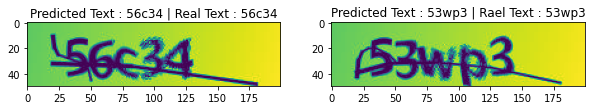

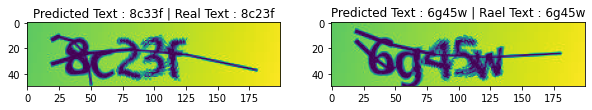

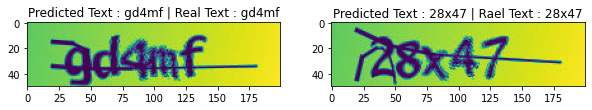

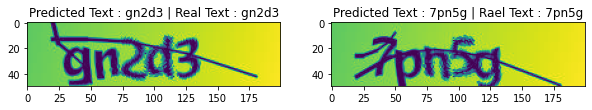

In [39]:
num = int(numTestingSamples/2)

for i in range(0, num):
  fig, axs = plt.subplots(1, 2, figsize=(10,10))
  axs[0].imshow(np.reshape(X_test[2*i],(50,200)))
  axs[0].set_title(f'Predicted Text : {predictedCaptchaText[2*i]} | Real Text : {testCaptchaText[2*i]}')
  axs[1].imshow(np.reshape(X_test[2*i + 1],(50,200)))
  axs[1].set_title(f'Predicted Text : {predictedCaptchaText[2*i + 1]} | Rael Text : {testCaptchaText[2*i + 1]}')